In [1]:
import numpy as np 
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator # for data augmentation
from matplotlib import pyplot
import csv

2022-07-02 19:36:39.166147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_path="/Users/joannaborowa/Desktop/archive 3/sign_mnist_train.csv"
train = open(file_path).read()

In [3]:
train = train.split("\n")[1:-1]
train = [i.split(",") for i in train]
X_train = np.array([[int(i[j]) for j in range(1,len(i))] for i in train])
y_train = np.array([int(i[0]) for i in train])

In [4]:
X_train = X_train[0:9]
y_train = y_train[0:9]

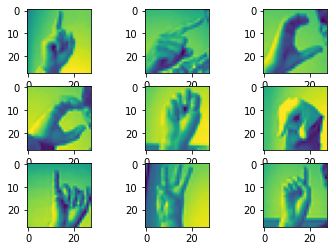

In [5]:
for i in range(0, 9):
        pyplot.subplot(3,3,i+1)
        pyplot.imshow(X_train[i].reshape((28, 28)))
pyplot.show()

In [6]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')

In [7]:
filename = "new_image_data.csv"
new_data = [] #store new images
new_label = [] #store the lable of new images

In [8]:
# more kinds of augmentation can be found at https://keras.io/preprocessing/image/
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,   
        samplewise_std_normalization=False,   
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)
datagen.fit(X_train)

/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/image.py:1874: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (9, 1, 28, 28) (28 channels).
  warnings.warn('Expected input to be images (as Numpy array) '


In [9]:
#output new images into CSV
def write_to_csv(original_data, label, filename):
    for i in range(0, len(original_data)):
        pre_process = original_data[i].reshape((28*28,1))
        single_pic = []
        single_pic.append(label[0][i])
        for j in range(0,len(pre_process)):
            temp_pix = pre_process[j][0]
            single_pic.append(temp_pix)
        with open(filename,"a") as f:
            f_csv = csv.writer(f, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
            f_csv.writerow(single_pic)

In [10]:
number_of_batches = 100
batches = 0

for X_batch, Y_batch in datagen.flow(X_train, y_train, batch_size=10):
    new_data.append(X_batch)
    new_label.append(Y_batch) 
#         loss = model.train(X_batch, Y_batch)
    batches += 1
    if batches >= number_of_batches:
        # we need to break the loop by hand because
        # the generator loops indefinitely
        break

/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/image.py:680: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (9, 1, 28, 28) (28 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


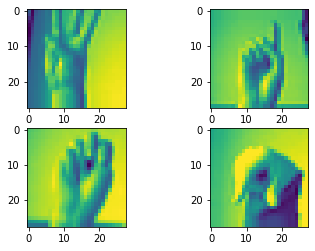

In [11]:
#show the new images
for i in range(0, 4):
        pyplot.subplot(2,2,i+1)
        pyplot.imshow(new_data[1][i].reshape((28, 28)))
    # show the plot
pyplot.show()

In [12]:
#write new images into CSV
for i in range(0,len(new_data)):
    write_to_csv(new_data[i], new_label, filename)

In [15]:
df=pd.read_csv('/Users/joannaborowa/Desktop/new_image_data.csv')

In [21]:
display(df.columns)
display(df.head())

Index(['8', '141.95424', '141.95424.1', '142.27231', '141.95424.2',
       '144.27231', '144.27231.1', '143.95424', '144.27231.2', '145.27231',
       ...
       '109.0.2', '102.0.2', '91.0.2', '65.0.2', '138.0.3', '189.0.2',
       '179.0.25', '181.0.4', '181.0.5', '179.0.26'],
      dtype='object', length=785)

,8,141.95424,141.95424.1,142.27231,141.95424.2,144.27231,144.27231.1,143.95424,144.27231.2,145.27231,...,109.0.2,102.0.2,91.0.2,65.0.2,138.0.3,189.0.2,179.0.25,181.0.4,181.0.5,179.0.26
0,13,165.65959,168.65959,171.65959,173.65959,176.82980,179.82980,181.65959,184.82980,185.82980,...,92.0,105.0,105.0,108.0,133.0,163.0,157.00000,163.0,164.0,179.00000
1,2,211.00000,211.00000,212.00000,212.00000,211.00000,210.00000,211.00000,210.00000,210.00000,...,235.0,234.0,233.0,231.0,230.0,226.0,225.00000,222.0,229.0,163.00000
2,16,163.90742,169.90742,171.90742,175.81487,179.90742,186.81487,190.90742,194.90742,199.81487,...,76.0,74.0,68.0,62.0,53.0,55.0,48.00000,238.0,255.0,255.00000
3,6,157.89890,158.93260,158.89890,158.89890,159.86519,159.89890,159.86519,159.93260,159.93260,...,69.0,149.0,128.0,87.0,94.0,163.0,175.00000,103.0,135.0,149.00000
4,22,114.00000,42.00000,74.00000,99.00000,104.00000,109.00000,117.00000,127.00000,142.00000,...,214.0,217.0,220.0,222.0,224.0,225.0,225.85823,226.0,226.0,227.85823


In [18]:
import tensorflow as tf
import tensorflow.keras.regularizers as regularizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

#for random select of pictures to print
import random

import os

In [24]:
#define features and target
x=df.drop(columns='8')
y=df['8']

# #reshape features into picture like structure & scale 
# x=x.to_numpy()
# x=x.reshape(27455,28,28)/255

In [25]:
#Split data in test & train
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,stratify=y)

print('Shapes of x_train and y_train: ',x_train.shape,y_train.shape)
print('Shapes of x_val and y_val: ',x_val.shape,y_val.shape)

print('y_train values :', np.sort(y_train.unique()))
print('y_val values :',np.sort(y_val.unique()))

Shapes of x_train and y_train:  (1439, 784) (1439,)
Shapes of x_val and y_val:  (360, 784) (360,)
y_train values : [ 2  3  6  8 13 16 22]
y_val values : [ 2  3  6  8 13 16 22]


In [26]:
# Define  & train the model without regularization
model1 = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(25, activation='softmax')
])

# Print the model summary
model1.summary()

# Use same settings
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING & VALIDATION:')
history1= model1.fit(x_train.to_numpy().reshape(x_train.shape[0],28,28)/255, y_train, epochs=5,validation_data=(x_val.to_numpy().reshape(x_val.shape[0],28,28)/255,y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         


2022-07-02 19:41:20.559360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 dense (Dense)               (None, 128)               102528    
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
Total params: 115,321
Trainable params: 115,321
Non-trainable params: 0
_________________________________________________________________

MODEL TRAINING & VALIDATION:
Epoch 1/5
45/45 [==============================] - 2s 28ms/step - loss: 2.1564 - accuracy: 0.2106 - val_loss: 1.9714 - val_accuracy: 0.2111
Epoch 2/5
45/45 [==============================] - 1s 20ms/step - loss: 1.9410 - accuracy: 0.1981 - val_loss: 1.9332 - val_accuracy: 0.2222
Epoch 3/5
45/45 [==============================] - 1s 18ms/step - loss: 1.9250 - accuracy: 0.2140 - val_loss: 1.9179 - val_accuracy: 0.2222
Epoch 4/5
45/45 [==============================] - 1s 18ms/step - loss: 1.9089 - a

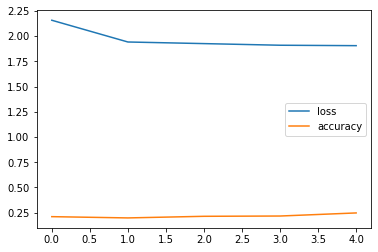

In [27]:
#Lets see how the metrics changed during training
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['accuracy'],label='accuracy')
plt.legend()
plt.show()

In [28]:
# Define  & train the model with regularisation (l2 0.001)
model2 = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  tf.keras.layers.Dense(25, activation='softmax')
])

# Print the model summary
model2.summary()

# Use same settings
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING & VALIDATION:')
history2= model2.fit(x_train.to_numpy().reshape(x_train.shape[0],28,28)/255, y_train, epochs=5,validation_data=(x_val.to_numpy().reshape(x_val.shape[0],28,28)/255,y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

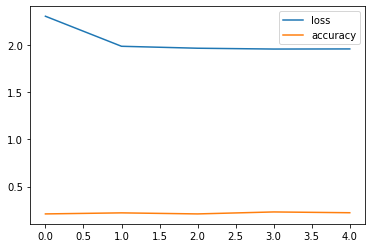

In [29]:
#Lets see how the metrics changed during training
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['accuracy'],label='accuracy')
plt.legend()
plt.show()

In [32]:
# Define  & train the model with dropout
model3 = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(25, activation='softmax')
])

# Print the model summary
model3.summary()

# Use same settings
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING & VALIDATION:')
history3= model3.fit(x_train.to_numpy().reshape(x_train.shape[0],28,28)/255, y_train, epochs=5,validation_data=(x_val.to_numpy().reshape(x_val.shape[0],28,28)/255,y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

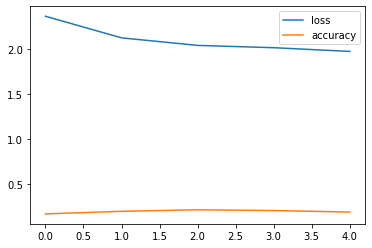

In [33]:
#Lets see how the metrics changed during training
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['accuracy'],label='accuracy')
plt.legend()
plt.show()

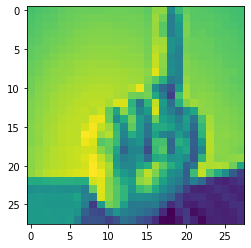

sample no:  4
model prediciton: 3
actual label: 3


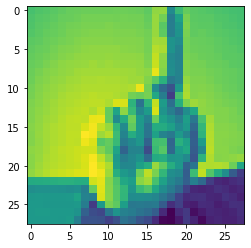

sample no:  8
model prediciton: 3
actual label: 3


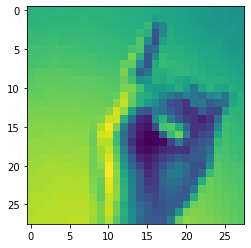

sample no:  34
model prediciton: 3
actual label: 3


In [37]:
#Lets see how the model will deal with test data

#load data
df_test=pd.read_csv('/Users/joannaborowa/Desktop/archive 3/sign_mnist_test.csv')

#define features and target
x_test=df_test.drop(columns='label')
y_test=df_test['label']

#select the target class we want to inspect
class_test=3                                    #pick one of the integers 0-24 representing one letter
class_list_test= y_test[y_test==class_test].index        #build a list of rows ids of samples belonging to selected class

#print picture, predicted and actual value in loop. Use i to change how many loops are made
for i,val in enumerate(class_list_test):
    if i<3:                                 #we will show only first 5 predictions and actual
        plt.imshow(x_test.loc[val,:].to_numpy().reshape(28,28))            #show picture with id 
        plt.show()
        print('sample no: ', val)           #show position
        print('model prediciton:',model1.predict(x_test.loc[val,:].to_numpy().reshape(1,28,28,1),verbose=0).argmax()) #show model prediction
        print('actual label:',y_test.loc[val])                                                       #show class  
    else:
        pass

In [38]:
#Lets evaluate results on unseen data (test data) on different models)
print('model 1 no regularization')
model1.evaluate(x_test.to_numpy().reshape(x_test.shape[0],28,28),y_test)
print('model 2 with L2 regularization')
model2.evaluate(x_test.to_numpy().reshape(x_test.shape[0],28,28),y_test)
print('model 3 with drop_out regularization')
model3.evaluate(x_test.to_numpy().reshape(x_test.shape[0],28,28),y_test)

model 1 no regularization
225/225 [==============================] - 1s 5ms/step - loss: 1476.9183 - accuracy: 0.0342
model 2 with L2 regularization
225/225 [==============================] - 1s 6ms/step - loss: 1207.8754 - accuracy: 0.0432
model 3 with drop_out regularization
225/225 [==============================] - 1s 6ms/step - loss: 995.8016 - accuracy: 0.0432


[995.8016357421875, 0.04322364926338196]